# App Behavior Analysis - Directing Customers to Subscription (part 1/2)

### Importing Libraries and the Data 

In [1]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting and stats:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Importing parser:
from dateutil import parser

In [2]:
# Loading the data:
app_dataset = pd.read_csv('appdata10.csv')

In [3]:
# To display first 5 rows of app_dataset:
app_dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
# To get stats for numerical columns of app_dataset:
app_dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


### Data Cleaning 

In [5]:
# Date format fixing (changing to integer):
app_dataset['hour'] = app_dataset.hour.str.slice(1,3).astype(int)

In [6]:
# Dropping columns, we don't need (keep app_dataset and define dataset2):
dataset2 = app_dataset.copy().drop(columns = ['user','screen_list', 'enrolled_date', 'first_open','enrolled'])

In [7]:
# Displaying first 5 rows of dataset2:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


### Analysing and Visualisation  Data 

#### Histograms 

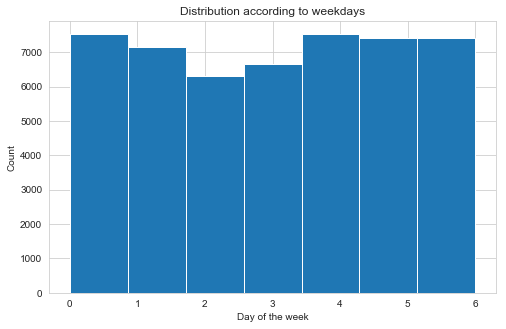

In [8]:
# Distribution for day of week:
plt.figure(figsize=(8, 5))
plt.hist(dataset2['dayofweek'],bins=len(dataset2['dayofweek'].unique()))

# Add labels for x and y axis:
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Distribution according to weekdays')
plt.show()

MON = 1, TUE = 2, WED = 3,..., SUN = 0. It seems like the lowest app usage is on Tuesday, otherwise the usage is somewhere between 6,000 and 8,000 per day.

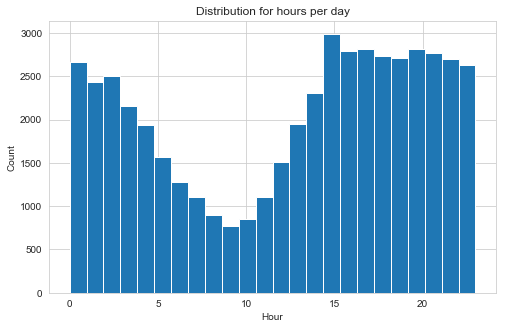

In [9]:
# Distribution for hour per day:
plt.figure(figsize=(8, 5))
plt.hist(dataset2['hour'],bins=len(dataset2['hour'].unique()))

# Add labels for x and y axis:
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution for hours per day')
plt.show()

We can see a decreasing pattern from 0:00 to 9:00, the usage is constantly increasing form 9:00 to 15:00 when it reaches maximum. From 16:00 to 23:00 users stay very active with slightly decreasing activity. 

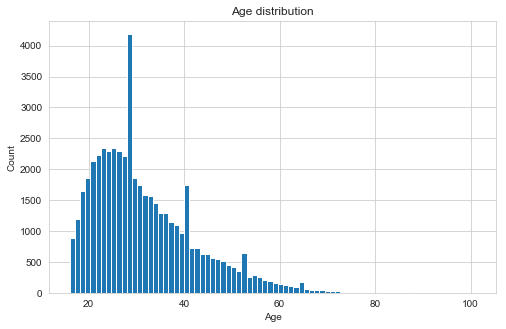

In [10]:
# Age distribution:
plt.figure(figsize=(8, 5))
plt.hist(dataset2['age'],bins=len(dataset2['age'].unique()))

# Add labels for x and y axis:
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

The largest age groups are in their 20s and early 30s. 

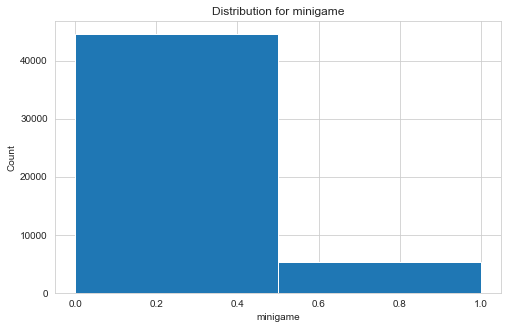

In [11]:
# Distribution for minigame:
plt.figure(figsize=(8, 5))
plt.hist(dataset2['minigame'],bins=len(dataset2['minigame'].unique()))

# Add labels for x and y axis:
plt.xlabel('minigame')
plt.ylabel('Count')
plt.title('Distribution for minigame')
plt.show()

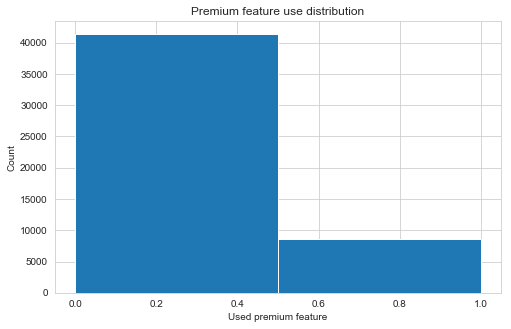

In [12]:
# Premium feature distribution:
plt.figure(figsize=(8, 5))
plt.hist(dataset2['used_premium_feature'],bins=len(dataset2['used_premium_feature'].unique()))

# Add labels for x and y axis:
plt.xlabel('Used premium feature')
plt.ylabel('Count')
plt.title('Premium feature use distribution')
plt.show()

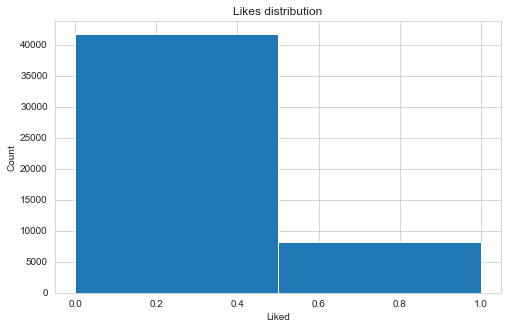

In [13]:
# Liked distribution:
plt.figure(figsize=(8, 5))
plt.hist(dataset2['liked'],bins=len(dataset2['liked'].unique()))

# Add labels for x and y axis:
plt.xlabel('Liked')
plt.ylabel('Count')
plt.title('Likes distribution')
plt.show()

#### Correlation 

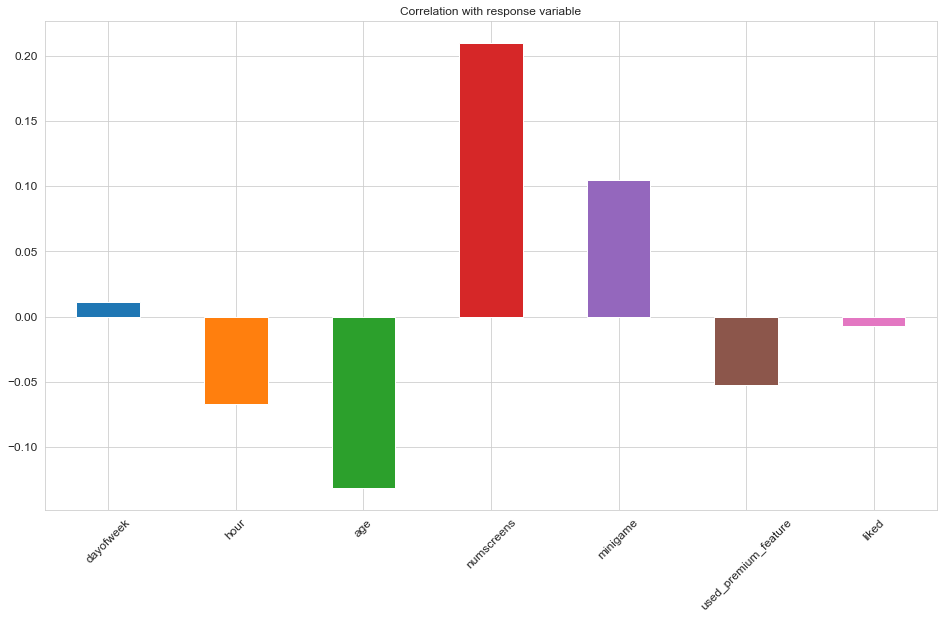

In [14]:
# To display correlation plot:
dataset2.corrwith(app_dataset.enrolled).plot.bar(figsize = (16,9),
                  title = 'Correlation with response variable',
                  fontsize = 12, rot = 45, grid = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


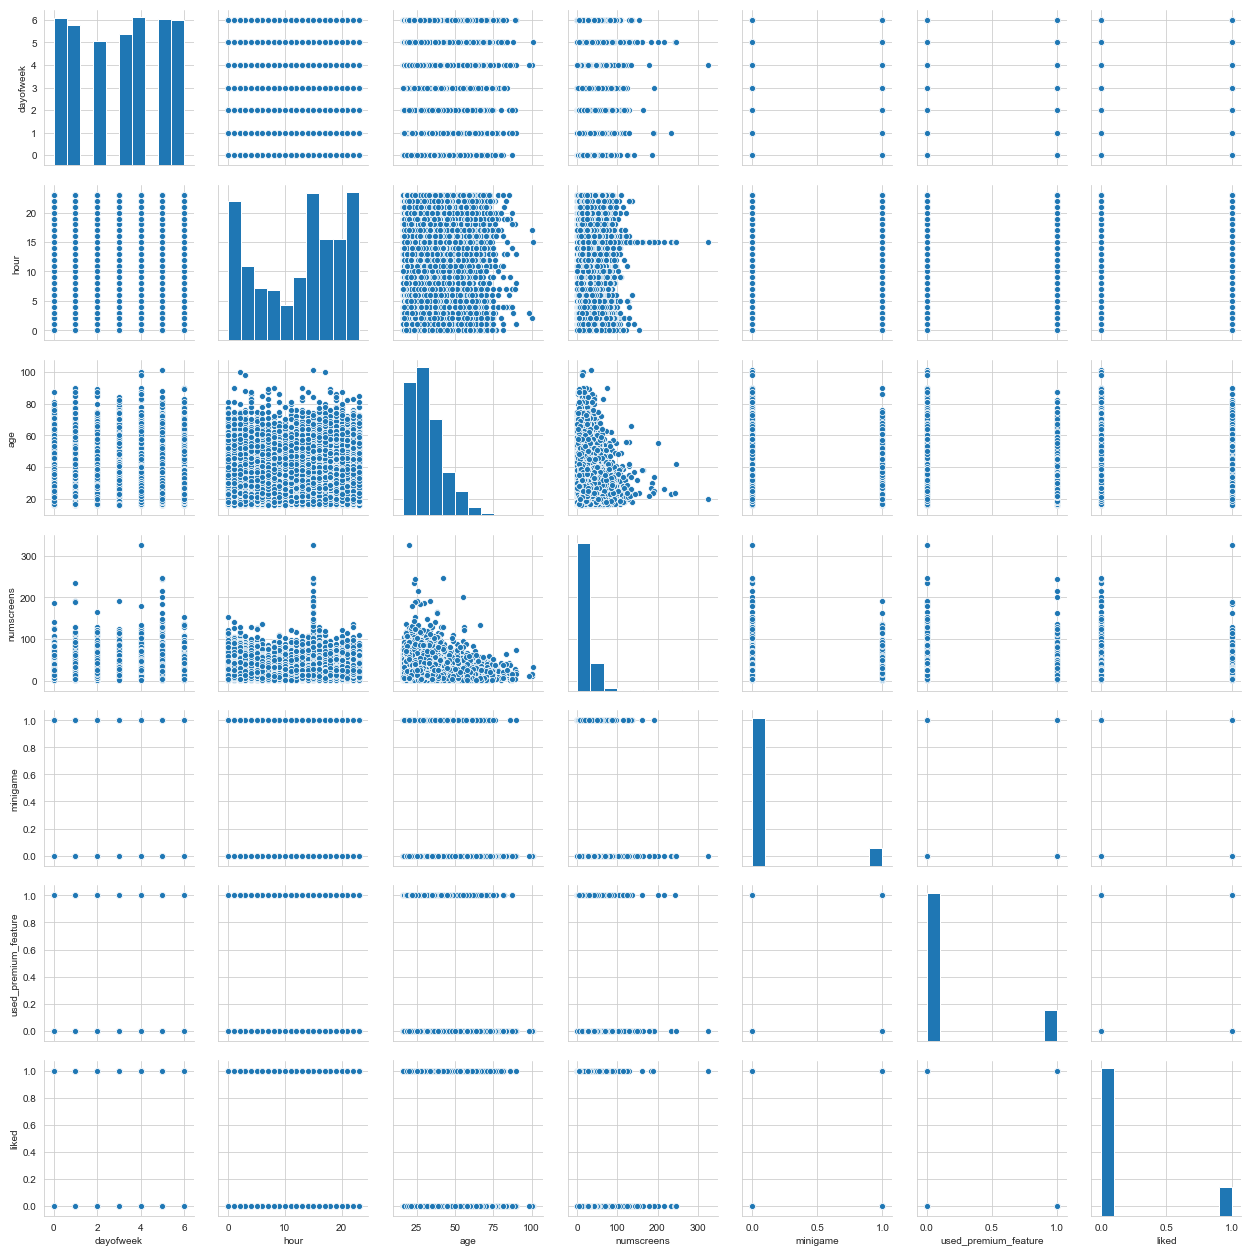

In [15]:
# Plotting all of the features of  app_dataset (scatter plots give us insight into correlation)
sns.pairplot(dataset2,palette='bright', size=2.5)
plt.show()

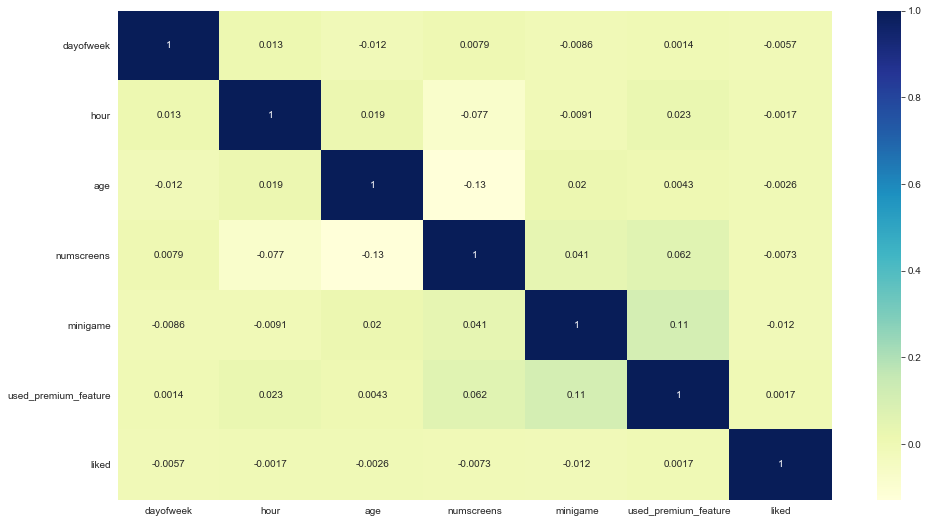

In [16]:
# Heat map or correlation matrix - displays correlation between all categories:
plt.figure(figsize=(16,9))
sns.heatmap(dataset2.corr(), cmap='YlGnBu', annot=True)
plt.show()

### Feature Engineering 

In [17]:
# To see the datatypes of features of our dataset:
app_dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [18]:
# Converting first_open and enrolled_date to datetime format:
app_dataset["first_open"] = [parser.parse(row_date) for row_date in app_dataset["first_open"]]

In [19]:
# Enrolled_date contains rows that are not populated, so extra if, else statement is needed in this case: 
app_dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in app_dataset["enrolled_date"]]

In [20]:
# Setting up a new column called difference:
app_dataset['difference'] = (app_dataset.enrolled_date - app_dataset.first_open).astype('timedelta64[h]')

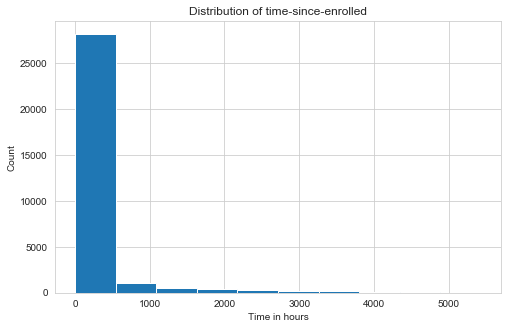

In [21]:
# Plotting the histogram to visualise distribution of time since enrolled:
plt.figure(figsize=(8, 5))
plt.hist(app_dataset['difference'].dropna())

# Adding the title:
plt.title('Distribution of time-since-enrolled')
plt.ylabel('Count')
plt.xlabel('Time in hours')

plt.show()

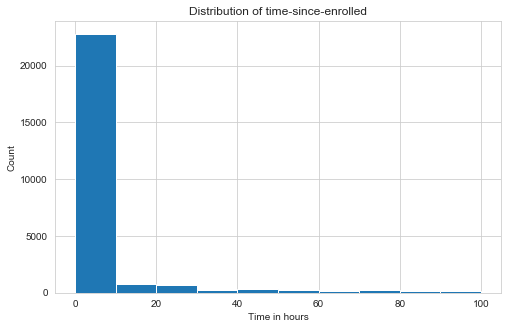

In [22]:
# Replotting the histogram and adding range:
plt.figure(figsize=(8, 5))
plt.hist(app_dataset['difference'].dropna(), range = [0,100])

# Adding the title:
plt.title('Distribution of time-since-enrolled')
plt.ylabel('Count')
plt.xlabel('Time in hours')

plt.show()

From the histogram we can see that most people enrolled within first 10 hours, but there is still some enrollment activity after exceeding 10 hours of trial subscription. 

In [23]:
# Removing records, we won't need:
app_dataset.loc[app_dataset.difference > 48, 'enrolled'] = 0
app_dataset = app_dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [24]:
# Loading and formatting the screen_list field:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [25]:
# We want to map screens to fields: 
app_dataset['screen_list'] = app_dataset.screen_list.astype(str) + ','

for i in top_screens:
    app_dataset[i] = app_dataset.screen_list.str.contains(i).astype(int)
    app_dataset['screen_list'] = app_dataset.screen_list.str.replace(i+',', '')
    
app_dataset['Other'] = app_dataset.screen_list.str.count(",")
app_dataset = app_dataset.drop(columns=['screen_list'])    

In [26]:
# Funnels
savings_screens = ['Saving1', 'Saving2', 'Saving2Amount','Saving4','Saving5',
                   'Saving6', 'Saving7', 'Saving8', 'Saving9', 'Saving10']
app_dataset['SavingCount'] = app_dataset[savings_screens].sum(axis=1)
app_dataset = app_dataset.drop(columns=savings_screens)

cm_screens = ['Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard']
app_dataset['CMCount'] = app_dataset[cm_screens].sum(axis=1)
app_dataset = app_dataset.drop(columns=cm_screens)

cc_screens = ['CC1', 'CC1Category', 'CC3']
app_dataset['CCCount'] = app_dataset[cc_screens].sum(axis=1)
app_dataset = app_dataset.drop(columns=cc_screens)

loan_screens = ['Loan', 'Loan2', 'Loan3', 'Loan4']
app_dataset['LoansCount'] = app_dataset[loan_screens].sum(axis=1)
app_dataset = app_dataset.drop(columns=loan_screens)

In [27]:
# Checking a data header:
app_dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [28]:
# Downloading app_dataset as new_appdate10.csv:
app_dataset.to_csv('new_appdate10.csv', index = False)